In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import os
import yaml

from tqdm.notebook import tqdm

import pickle


In [2]:
#with open('h5_cosmics_with_segment_angles.pkl', 'rb') as f:
#    df = pickle.load(f)

with open('h5_highEmuon_with_segment_angles.pkl', 'rb') as f:
    df = pickle.load(f)

num_events = len(df)

df


,file,entry,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,...,true_segment_lengths,truth_ke,reco_ke,reco_mcs_ke,reco_csda_ke,reco_calo_ke,reco_segment_dirs,reco_segment_angles,true_segment_dirs,true_segment_angles
0,larcv_mc_20250625_001746_870122_6b0a8860-e7b1-...,0,False,False,True,True,"[-179.55002, 154.04996, 4.25]","[-179.55002, 154.05002, 4.25]","[0.9803921, -0.0946992, 0.17281024]","[0.97912776, -0.097012796, 0.17859796]",...,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",100003.293954,1687.969508,1687.969508,881.363691,806.482117,"[[0.97961074, -0.10647929, 0.17036697], [0.981...","[0.021087611, 0.029116387, 0.029398322, 0.0848...","[[0.97961074, -0.10647929, 0.17036697], [0.981...","[0.021087611, 0.029116387, 0.029398322, 0.0848..."
1,larcv_mc_20250625_001746_870122_6b0a8860-e7b1-...,1,False,False,True,True,"[-23.850006, -109.350006, 10.25]","[-23.549988, -109.65001, 10.550003]","[0.36290038, 0.8886414, 0.28039205]","[0.35591567, 0.89514333, 0.2684072]",...,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",99998.400565,1344.491911,1344.491911,789.721672,756.182190,"[[0.36064085, 0.89099973, 0.2757856], [0.34594...","[0.04368991, 0.04362143, 0.009760467, 0.066657...","[[0.36064085, 0.89099973, 0.2757856], [0.34594...","[0.04368991, 0.04362143, 0.009760467, 0.066657..."
2,larcv_mc_20250625_001746_870122_6b0a8860-e7b1-...,2,False,False,True,True,"[-118.95001, -133.65, 288.35]","[-118.65001, -133.35, 288.05002]","[0.45009753, 0.8539569, -0.2610935]","[0.4489212, 0.85516113, -0.2591701]",...,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",99998.370920,1200.705090,1200.705090,889.602994,895.886475,"[[-0.44925493, -0.85572535, 0.25671804], [-0.4...","[0.036955144, 0.04717792, 0.09439409, 0.049496...","[[-0.44925493, -0.85572535, 0.25671804], [-0.4...","[0.036955144, 0.04717792, 0.09439409, 0.144162..."
3,larcv_mc_20250625_001746_870122_6b0a8860-e7b1-...,3,False,False,True,True,"[78.149994, -22.049988, 104.15]","[78.149994, -22.350006, 104.450005]","[-0.05194928, 0.9894481, 0.13525437]","[-0.05109994, 0.9904631, 0.12795193]",...,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",99993.690386,958.090138,958.090138,519.211888,602.352722,"[[-0.042360116, 0.99550366, 0.084723465], [-0....","[0.04936657, 0.021078696, 0.029910851, 0.03015...","[[-0.042360116, 0.99550366, 0.084723465], [-0....","[0.04936657, 0.030288853, 0.029927885, 0.04742..."
4,larcv_mc_20250625_001746_870122_6b0a8860-e7b1-...,4,False,False,True,True,"[105.45001, -23.850006, 27.94999]","[105.45001, -24.149994, 28.550003]","[-0.34560803, 0.84197015, 0.4142962]","[-0.3491744, 0.8463207, 0.40226677]",...,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",99998.340844,99999.997355,99999.997355,607.546979,613.468689,"[[-0.3426835, 0.8567055, 0.38551757], [-0.3616...","[0.051813833, 0.06893533, 0.067090996, 0.01998...","[[-0.3426835, 0.8567055, 0.38551757], [-0.3616...","[0.051813833, 0.06893533, 0.067090996, 0.01998..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,larcv_mc_20250625_032107_664854_c77a4d57-764a-...,5,False,False,True,True,"[-29.850006, -21.450012, 471.95004]","[-29.850006, -21.450012, 471.95004]","[0.79990965, 0.24595162, -0.547405]","[0.80140793, 0.24432656, -0.5459394]",...,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",100003.288966,1532.272540,1532.272540,656.135382,680.276733,"[[-0.80650437, -0.2122381, 0.55182034], [-0.80...","[0.048522297, 0.04173321, 0.08790839, 0.020563...","[[-0.80650437, -0.2122381, 0.55182034], [-0.80...","[0.048522297, 0.04173321, 0.08790839, 0.020563..."
9794,larcv_mc_20250625_032107_664854_c77a4d57-764a-...,6,False,False,True,True,"[24.149994, 137.55002, 504.95004]","[24.149994, 137.55002, 504.95004]","[-0.13083926, -0.9822789, -0.13419862]","[-0.14335513, -0.97902197, -0.1447941]",...,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",99993.685904,4264.691348,4264.691348,782.714407,

In [3]:
true_start_dir = df["true_start_dir"].to_numpy()
start_dir_x = np.array([d[0] for d in true_start_dir])
start_dir_y = np.array([d[1] for d in true_start_dir])
start_dir_z = np.array([d[2] for d in true_start_dir])

df["true_angle_from_x_dir"] = np.arccos(start_dir_x / np.sqrt(start_dir_x**2 + start_dir_y**2 + start_dir_z**2)) * 180 / np.pi
df["true_angle_from_x_axis"] = 90 - np.abs(df["true_angle_from_x_dir"].to_numpy() - 90)


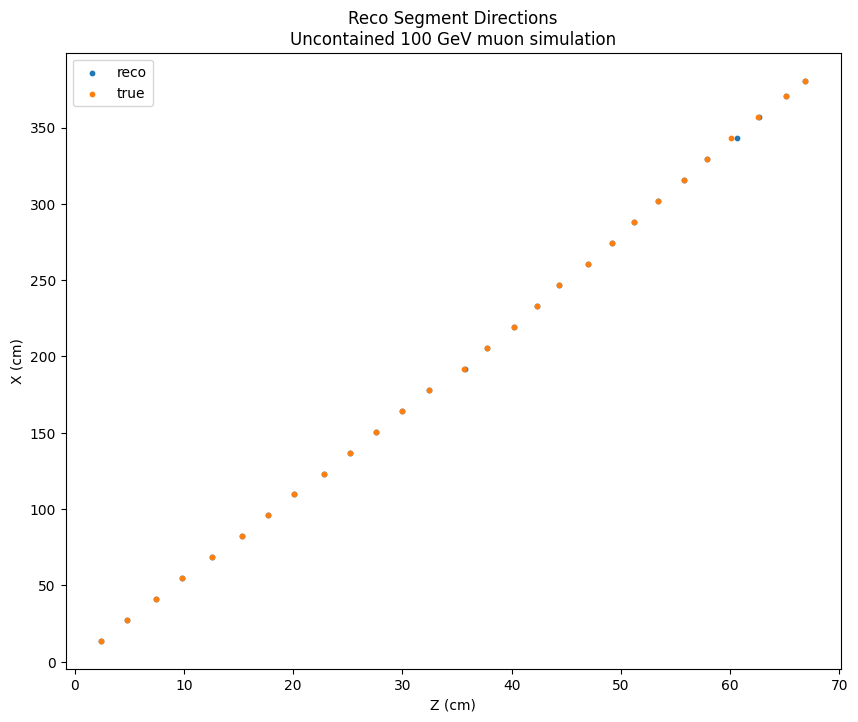

In [4]:
max_plots = 1
num_plots = 0

reco_segment_dirs = df['reco_segment_dirs'].to_numpy()
reco_segment_lengths = df['reco_segment_lengths'].to_numpy()
true_segment_dirs = df['true_segment_dirs'].to_numpy()
true_segment_lengths = df['true_segment_lengths'].to_numpy()
files = df['file'].to_numpy()
reco_points_by_event = []
true_points_by_event = []
for event_i in range(num_events):

    reco_points = []
    curr_reco_x = 0.
    curr_reco_y = 0.
    curr_reco_z = 0.
    for j in range(len(reco_segment_dirs[event_i])):
        curr_reco_x += reco_segment_dirs[event_i][j][0] * reco_segment_lengths[event_i][j]
        curr_reco_y += reco_segment_dirs[event_i][j][1] * reco_segment_lengths[event_i][j]
        curr_reco_z += reco_segment_dirs[event_i][j][2] * reco_segment_lengths[event_i][j]
        reco_points.append(np.array([curr_reco_x, curr_reco_y, curr_reco_z]))
    reco_points = np.array(reco_points)
    reco_points_by_event.append(reco_points)

    true_points = []
    curr_true_x = 0.
    curr_true_y = 0.
    curr_true_z = 0.
    for j in range(len(true_segment_dirs[event_i])):
        curr_true_x += true_segment_dirs[event_i][j][0] * true_segment_lengths[event_i][j]
        curr_true_y += true_segment_dirs[event_i][j][1] * true_segment_lengths[event_i][j]
        curr_true_z += true_segment_dirs[event_i][j][2] * true_segment_lengths[event_i][j]
        true_points.append(np.array([curr_true_x, curr_true_y, curr_true_z]))
    true_points = np.array(true_points)
    true_points_by_event.append(true_points)
    
    if num_plots < max_plots:
        plt.figure(figsize=(10, 8))
        plt.scatter(reco_points[:, 2], reco_points[:, 0], s=10, label='reco')
        plt.scatter(true_points[:, 2], true_points[:, 0], s=10, label='true')
        plt.xlabel('Z (cm)')
        plt.ylabel('X (cm)')
        plt.title('Reco Segment Directions\nUncontained 100 GeV muon simulation')
        plt.legend()
        plt.show()
        num_plots += 1

df["reco_points"] = reco_points_by_event
df["true_points"] = true_points_by_event



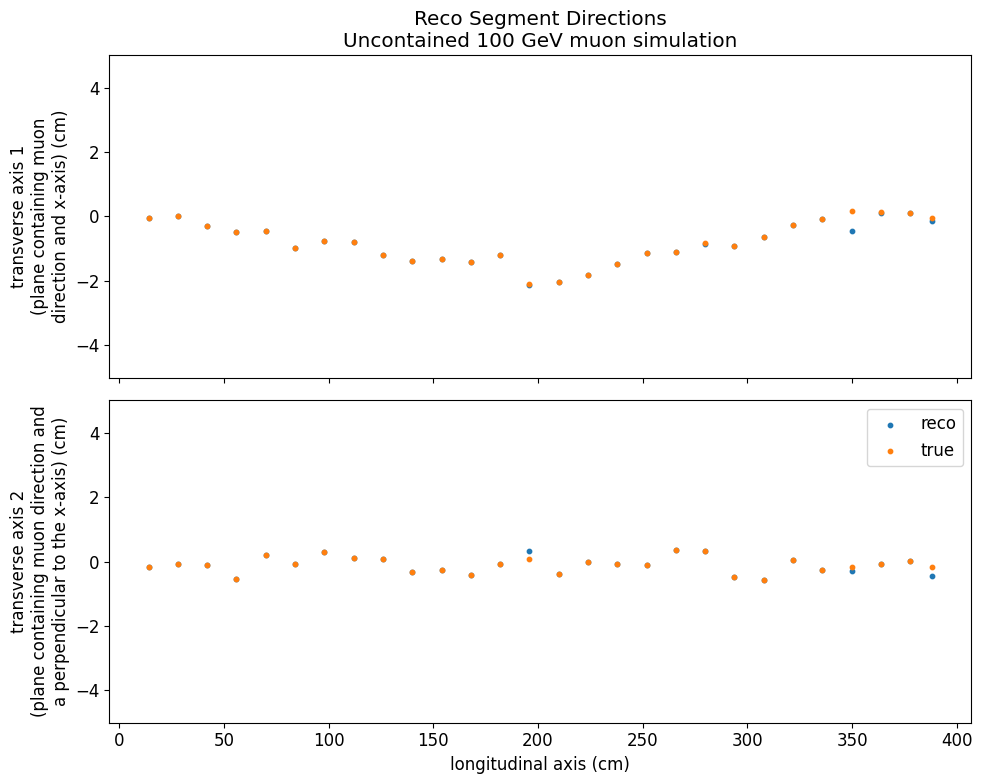

/tmp/ipykernel_2994569/1321306688.py:63: RuntimeWarning: invalid value encountered in divide
  muon_dir = muon_dir / np.linalg.norm(muon_dir)


In [5]:
max_plots = 1
num_plots = 0

mpl.rcParams['font.size'] = 12

def apply_rotation(points, plane_normal, new_x_axis):

    if np.isnan(new_x_axis).any():
        print("new_x_axis", new_x_axis)
        print("plane_normal", plane_normal)
        print("points", points)
        raise ValueError("nan new_x_axis!")

    if np.all(plane_normal == 0):
        raise ValueError("plane_normal is 0 vector!")

    # First rotation: rotate around x-axis to make mu_x_plane_normal point along z
    cos_theta = np.dot(plane_normal, [0, 0, 1])
    cos_theta = np.clip(cos_theta, -1, 1)
    theta = np.arccos(cos_theta)
    rotation_axis = np.cross(plane_normal, [0, 0, 1])

    rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)
    K = np.array([[0, -rotation_axis[2], rotation_axis[1]],
                    [rotation_axis[2], 0, -rotation_axis[0]],
                    [-rotation_axis[1], rotation_axis[0], 0]])
    R1 = np.eye(3) + np.sin(theta) * K + (1 - cos_theta) * np.matmul(K, K)

    # Apply first rotation
    rotated_points = np.dot(points, R1.T)
    rotated_new_x_axis = np.dot(new_x_axis, R1.T)

    # Second rotation: rotate in x-y plane to align new_x_axis with x-axis
    phi = np.arctan2(rotated_new_x_axis[1], rotated_new_x_axis[0])
    R2 = np.array([[np.cos(phi), np.sin(phi), 0],
                   [-np.sin(phi), np.cos(phi), 0],
                   [0, 0, 1]])

    # Apply second rotation
    final_points = np.dot(rotated_points, R2.T)

    if np.isnan(final_points).any():
        print("points", points)
        print("plane_normal", plane_normal)
        print("new_x_axis", new_x_axis)
        print("final_points", final_points)
        print("rotated_points", rotated_points)
        print("R1", R1)
        print("R2", R2)
        raise ValueError("nan final_points!")
    
    return final_points

reco_points_by_event = df["reco_points"].to_numpy()
reco_lengths_by_event = df["reco_segment_lengths"].to_numpy()
true_points_by_event = df["true_points"].to_numpy()
true_lengths_by_event = df["true_segment_lengths"].to_numpy()

for event_i in range(num_events):
    reco_points = reco_points_by_event[event_i]
    true_points = true_points_by_event[event_i]
    muon_dir = true_points[-1] - true_points[0]
    muon_dir = muon_dir / np.linalg.norm(muon_dir)

    if np.isnan(muon_dir).any(): # arbitrary choices if the muon direction is zero vector
        muon_dir = np.array([0., 0., 1.])
    mu_x_plane_normal = np.cross(muon_dir, np.array([1., 0., 0.]))
    if np.allclose(muon_dir, [1.0, 0.0, 0.0]) or np.allclose(muon_dir, [-1.0, 0.0, 0.0]):
        # arbitrary choice if muon direction is along x-axis
        mu_x_plane_normal = np.array([0., 1., 0.])
    mu_x_plane_normal /= np.linalg.norm(mu_x_plane_normal)
    mu_x_plane_projected_reco_points = reco_points - np.dot(reco_points, mu_x_plane_normal[:, np.newaxis]) * mu_x_plane_normal[np.newaxis, :]
    mu_x_plane_projected_true_points = true_points - np.dot(true_points, mu_x_plane_normal[:, np.newaxis]) * mu_x_plane_normal[np.newaxis, :]

    if np.isnan(mu_x_plane_normal).any():
        print("muon_dir", muon_dir)
        print("mu_x_plane_normal", mu_x_plane_normal)
        raise ValueError("nan mu_x_plane_normal here!")

    mu_x_transformed_reco_points = apply_rotation(mu_x_plane_projected_reco_points, mu_x_plane_normal, muon_dir)
    mu_x_transformed_true_points = apply_rotation(mu_x_plane_projected_true_points, mu_x_plane_normal, muon_dir)

    mu_antix_plane_normal = np.cross(muon_dir, np.cross(muon_dir, np.array([1, 0, 0])))
    if np.isnan(mu_antix_plane_normal).any(): # arbitrary choice if muon direction is along x-axis
        mu_antix_plane_normal = np.array([0, 1, 0])
    mu_antix_plane_normal /= np.linalg.norm(mu_antix_plane_normal)
    mu_antix_plane_projected_reco_points = reco_points - np.dot(reco_points, mu_antix_plane_normal[:, np.newaxis]) * mu_antix_plane_normal[np.newaxis, :]
    mu_antix_plane_projected_true_points = true_points - np.dot(true_points, mu_antix_plane_normal[:, np.newaxis]) * mu_antix_plane_normal[np.newaxis, :]

    mu_antix_transformed_reco_points = apply_rotation(mu_antix_plane_projected_reco_points, mu_antix_plane_normal, muon_dir)
    mu_antix_transformed_true_points = apply_rotation(mu_antix_plane_projected_true_points, mu_antix_plane_normal, muon_dir)

    if num_plots < max_plots:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
        
        ax1.scatter(mu_x_transformed_reco_points[:, 0], mu_x_transformed_reco_points[:, 1], s=10, label='reco')
        ax1.scatter(mu_x_transformed_true_points[:, 0], mu_x_transformed_true_points[:, 1], s=10, label='true')
        ax1.set_ylabel('transverse axis 1\n(plane containing muon\ndirection and x-axis) (cm)')
        ax1.set_title('Reco Segment Directions\nUncontained 100 GeV muon simulation')
        ax1.set_ylim(-5, 5)

        ax2.scatter(mu_antix_transformed_reco_points[:, 0], mu_antix_transformed_reco_points[:, 1], s=10, label='reco')
        ax2.scatter(mu_antix_transformed_true_points[:, 0], mu_antix_transformed_true_points[:, 1], s=10, label='true')
        ax2.set_xlabel('longitudinal axis (cm)')
        ax2.set_ylabel('transverse axis 2\n(plane containing muon direction and\na perpendicular to the x-axis) (cm)')
        ax2.set_ylim(-5, 5)

        plt.legend()

        plt.tight_layout()
        plt.show()

        num_plots += 1


In [6]:
def get_segment_angle_from_3_points(point_1, point_2, point_3, two_d_signed_axis=None):
    diff1 = point_2 - point_1
    diff2 = point_3 - point_2
    dir1 = diff1 / np.linalg.norm(diff1)
    dir2 = diff2 / np.linalg.norm(diff2)
    if two_d_signed_axis is not None:
        ret = np.arctan2(np.dot(np.cross(dir1, dir2), two_d_signed_axis), np.dot(dir1, dir2))
    else:
        ret = np.arccos(np.clip(np.dot(dir1, dir2), -1, 1))
    
    # check for nan
    if np.isnan(ret):
        print("two_d_signed_axis", two_d_signed_axis)
        print("directions", dir1, dir2)
        print("points", point_1, point_2, point_3)
        print("diffs", diff1, diff2)
        print("cross", np.cross(dir1, dir2))
        #print("dot product with cross", np.dot(np.cross(dir1, dir2), two_d_signed_axis))
        raise ValueError("nan angle!")
    return ret
        
#get_segment_angle_from_3_points(np.array([-1, 0, 0]), np.array([0, 0, 0]), np.array([1, -1, 0]), two_d_signed_axis=np.array([0, 0, 1])) * 180 / np.pi

In [7]:
reco_3d_angles = []
reco_2d_angle_mu_x = []
reco_2d_angle_mu_antix = []

true_3d_angles = []
true_2d_angle_mu_x = []
true_2d_angle_mu_antix = []

all_reco_points = df["reco_points"].to_numpy()
all_true_points = df["true_points"].to_numpy()
muon_dir = [points[-1] - points[0] for points in all_true_points]
all_reco_segment_lengths = df["reco_segment_lengths"].to_numpy()
all_true_segment_lengths = df["true_segment_lengths"].to_numpy()
x_axis = np.array([1.0, 0.0, 0.0])
z_axis = np.array([0.0, 0.0, 1.0])
for event_i in tqdm(range(len(reco_segment_dirs))):

    event_muon_dir = muon_dir[event_i]
    if np.allclose(event_muon_dir, [0., 0., 0.]):
        event_muon_dir = np.array([0., 0., 1.])
    if np.allclose(mu_x_plane_normal, [0., 0., 0.]):
        mu_x_plane_normal = np.array([0., 1., 0.])
    if np.allclose(mu_antix_plane_normal, [0., 0., 0.]):
        mu_antix_plane_normal = np.array([0, 1, 0])

    if np.isnan(event_muon_dir).any(): # arbitrary choice if the muon direction is zero vector
        event_muon_dir = np.array([0., 0., 1.])

    if np.allclose(event_muon_dir, [1.0, 0.0, 0.0]) or np.allclose(event_muon_dir, [-1.0, 0.0, 0.0]): # arbitrary choice if muon direction is along x-axis
        mu_x_plane_normal = np.array([0., 1., 0.])

    mu_x_plane_normal = np.cross(event_muon_dir, np.array([1., 0., 0.]))
    mu_x_plane_normal = mu_x_plane_normal / np.linalg.norm(mu_x_plane_normal)
    mu_antix_plane_normal = np.cross(event_muon_dir, np.cross(event_muon_dir, np.array([1, 0, 0])))
    mu_antix_plane_normal = mu_antix_plane_normal / np.linalg.norm(mu_antix_plane_normal)

    event_reco_3d_angles = []
    event_reco_2d_angle_mu_x = []
    event_reco_2d_angle_mu_antix = []
    event_true_3d_angles = []
    event_true_2d_angle_mu_x = []
    event_true_2d_angle_mu_antix = []

    event_reco_points = all_reco_points[event_i]
    event_true_points = all_true_points[event_i]
    event_reco_segment_lengths = all_reco_segment_lengths[event_i]
    event_true_segment_lengths = all_true_segment_lengths[event_i]

    for segment_i in range(len(event_reco_points) - 2):

        if event_reco_segment_lengths[segment_i] < 14 or event_reco_segment_lengths[segment_i + 1] < 14:
            #print("skipping these reco segments, too short: ", segment_1_length, segment_2_length)
            continue

        reco_point_1 = event_reco_points[segment_i]
        reco_point_2 = event_reco_points[segment_i + 1]
        reco_point_3 = event_reco_points[segment_i + 2]
        segment_reco_points = np.array([reco_point_1, reco_point_2, reco_point_3])
        reco_angle_3d = get_segment_angle_from_3_points(reco_point_1, reco_point_2, reco_point_3)
        event_reco_3d_angles.append(reco_angle_3d)

        mu_x_plane_projected_segment_reco_points = segment_reco_points - np.dot(segment_reco_points, mu_x_plane_normal[:, np.newaxis]) * mu_x_plane_normal[np.newaxis, :]
        if np.isnan(mu_x_plane_projected_segment_reco_points).any():
            print("mu_x_plane_normal", mu_x_plane_normal)
            raise ValueError("nan mu_x_plane_normal here 2!")
        mu_x_transformed_segment_reco_points = apply_rotation(mu_x_plane_projected_segment_reco_points, mu_x_plane_normal, event_muon_dir)
        if np.isnan(mu_x_transformed_segment_reco_points).any():
            print("mu_x_plane_projected_segment_reco_points", mu_x_plane_projected_segment_reco_points)
            print("mu_x_transformed_segment_reco_points", mu_x_transformed_segment_reco_points)
            print("mu_x_plane_normal", mu_x_plane_normal)
            print("event_muon_dir", event_muon_dir)
            print("mu_x_plane_projected_segment_reco_points", mu_x_plane_projected_segment_reco_points)
            raise ValueError("nan mu_x_transformed_segment_reco_points!")
        mu_x_transformed_angle = get_segment_angle_from_3_points(
            mu_x_transformed_segment_reco_points[0],
            mu_x_transformed_segment_reco_points[1],
            mu_x_transformed_segment_reco_points[2],
            two_d_signed_axis=np.array([0., 0., 1.])
        )
        event_reco_2d_angle_mu_x.append(mu_x_transformed_angle)

        mu_antix_plane_projected_segment_reco_points = segment_reco_points - np.dot(segment_reco_points, mu_antix_plane_normal[:, np.newaxis]) * mu_antix_plane_normal[np.newaxis, :]
        if np.isnan(mu_antix_plane_projected_segment_reco_points).any():
            print("mu_antix_plane_normal", mu_antix_plane_normal)
            raise ValueError("nan mu_antix_plane_normal here 2!")
        mu_antix_transformed_segment_reco_points = apply_rotation(mu_antix_plane_projected_segment_reco_points, mu_antix_plane_normal, event_muon_dir)
        if np.isnan(mu_antix_transformed_segment_reco_points).any():
            print("mu_antix_plane_normal", mu_antix_plane_normal)
            print("event_muon_dir", event_muon_dir)
            print("mu_antix_plane_projected_segment_reco_points", mu_antix_plane_projected_segment_reco_points)
            raise ValueError("nan mu_antix_transformed_segment_reco_points!")
        mu_antix_transformed_angle = get_segment_angle_from_3_points(
            mu_antix_transformed_segment_reco_points[0],
            mu_antix_transformed_segment_reco_points[1],
            mu_antix_transformed_segment_reco_points[2],
            two_d_signed_axis=np.array([0., 0., 1.])
        )
        event_reco_2d_angle_mu_antix.append(mu_antix_transformed_angle)

    for segment_i in range(len(event_true_points) - 2):

        if event_true_segment_lengths[segment_i] < 14 or event_true_segment_lengths[segment_i + 1] < 14:
            #print("skipping these reco segments, too short: ", segment_1_length, segment_2_length)
            continue

        true_point_1 = event_true_points[segment_i]
        true_point_2 = event_true_points[segment_i + 1]
        true_point_3 = event_true_points[segment_i + 2]
        segment_true_points = np.array([true_point_1, true_point_2, true_point_3])
        true_angle_3d = get_segment_angle_from_3_points(true_point_1, true_point_2, true_point_3)
        event_true_3d_angles.append(true_angle_3d)

        mu_x_plane_projected_segment_true_points = segment_true_points - np.dot(segment_true_points, mu_x_plane_normal[:, np.newaxis]) * mu_x_plane_normal[np.newaxis, :]
        if np.isnan(mu_x_plane_projected_segment_true_points).any():
            print("mu_x_plane_normal", mu_x_plane_normal)
            raise ValueError("nan mu_x_plane_normal here 3!")
        mu_x_transformed_segment_true_points = apply_rotation(mu_x_plane_projected_segment_true_points, mu_x_plane_normal, event_muon_dir)
        if np.isnan(mu_x_transformed_segment_true_points).any():
            print("mu_x_plane_projected_segment_true_points", mu_x_plane_projected_segment_true_points)
            print("mu_x_transformed_segment_true_points", mu_x_transformed_segment_true_points)
            print("mu_x_plane_normal", mu_x_plane_normal)
            print("event_muon_dir", event_muon_dir)
            raise ValueError("nan mu_x_transformed_segment_true_points!")
        mu_x_transformed_angle = get_segment_angle_from_3_points(
            mu_x_transformed_segment_true_points[0],
            mu_x_transformed_segment_true_points[1],
            mu_x_transformed_segment_true_points[2],
            two_d_signed_axis=np.array([0., 0., 1.])
        )
        event_true_2d_angle_mu_x.append(mu_x_transformed_angle)

        mu_antix_plane_projected_segment_true_points = segment_true_points - np.dot(segment_true_points, mu_antix_plane_normal[:, np.newaxis]) * mu_antix_plane_normal[np.newaxis, :]
        if np.isnan(mu_antix_plane_projected_segment_true_points).any():
            print("mu_antix_plane_normal", mu_antix_plane_normal)
            raise ValueError("nan mu_antix_plane_normal here 3!")
        mu_antix_transformed_segment_true_points = apply_rotation(mu_antix_plane_projected_segment_true_points, mu_antix_plane_normal, event_muon_dir)
        if np.isnan(mu_antix_transformed_segment_true_points).any():
            print("mu_antix_plane_normal", mu_antix_plane_normal)
            print("event_muon_dir", event_muon_dir)
            print("mu_antix_plane_projected_segment_true_points", mu_antix_plane_projected_segment_true_points)
            raise ValueError("nan mu_antix_transformed_segment_true_points!")
        mu_antix_transformed_angle = get_segment_angle_from_3_points(
            mu_antix_transformed_segment_true_points[0],
            mu_antix_transformed_segment_true_points[1],
            mu_antix_transformed_segment_true_points[2],
            two_d_signed_axis=np.array([0., 0., 1.])
        )
        event_true_2d_angle_mu_antix.append(mu_antix_transformed_angle)
        
    reco_3d_angles.append(np.array(event_reco_3d_angles))
    reco_2d_angle_mu_x.append(np.array(event_reco_2d_angle_mu_x))
    reco_2d_angle_mu_antix.append(np.array(event_reco_2d_angle_mu_antix))

    true_3d_angles.append(np.array(event_true_3d_angles))
    true_2d_angle_mu_x.append(np.array(event_true_2d_angle_mu_x))
    true_2d_angle_mu_antix.append(np.array(event_true_2d_angle_mu_antix))

df["reco_3d_angles"] = reco_3d_angles
df["reco_2d_angle_mu_x"] = reco_2d_angle_mu_x
df["reco_2d_angle_mu_antix"] = reco_2d_angle_mu_antix

df["true_3d_angles"] = true_3d_angles
df["true_2d_angle_mu_x"] = true_2d_angle_mu_x
df["true_2d_angle_mu_antix"] = true_2d_angle_mu_antix


  0%|          | 0/9798 [00:00<?, ?it/s]

In [8]:
all_angles = df['reco_segment_angles'].to_numpy() * 180 / np.pi
median_angles = []
spread_angles_68 = []
for event_angles in all_angles:
    if len(event_angles) == 0:
        median_angles.append(np.nan)
    else:
        median_angles.append(np.median(event_angles))
df['median_reco_segment_angle'] = median_angles

all_angles = df['true_segment_angles'].to_numpy() * 180 / np.pi
median_angles = []
spread_angles_68 = []
for event_angles in all_angles:
    if len(event_angles) == 0:
        median_angles.append(np.nan)
    else:
        median_angles.append(np.median(event_angles))
df['median_true_segment_angle'] = median_angles

In [9]:
uncontained_df = df.query('true_contained == False')
print(len(uncontained_df))


9777


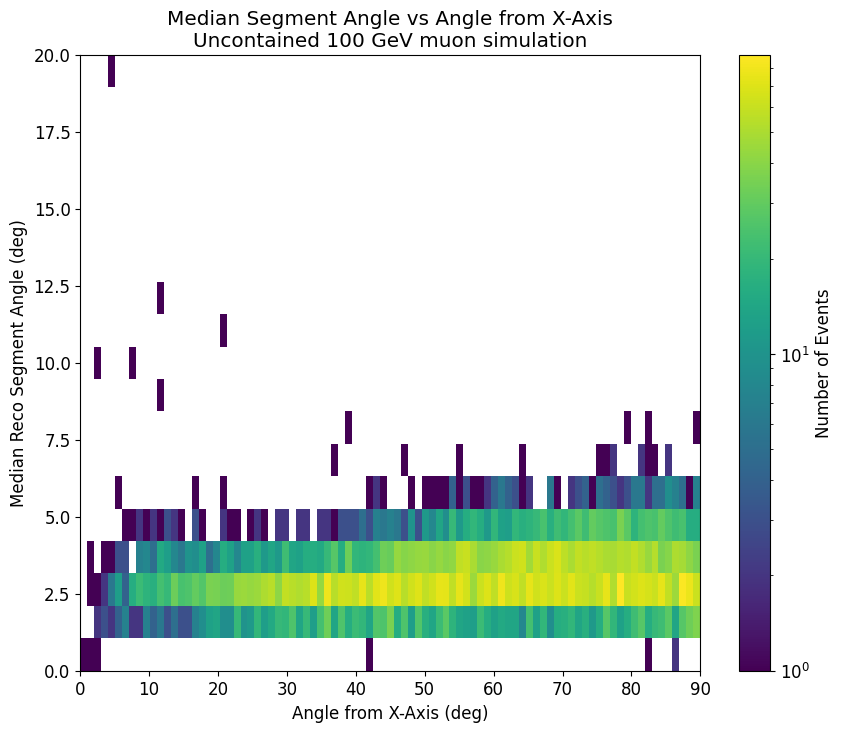

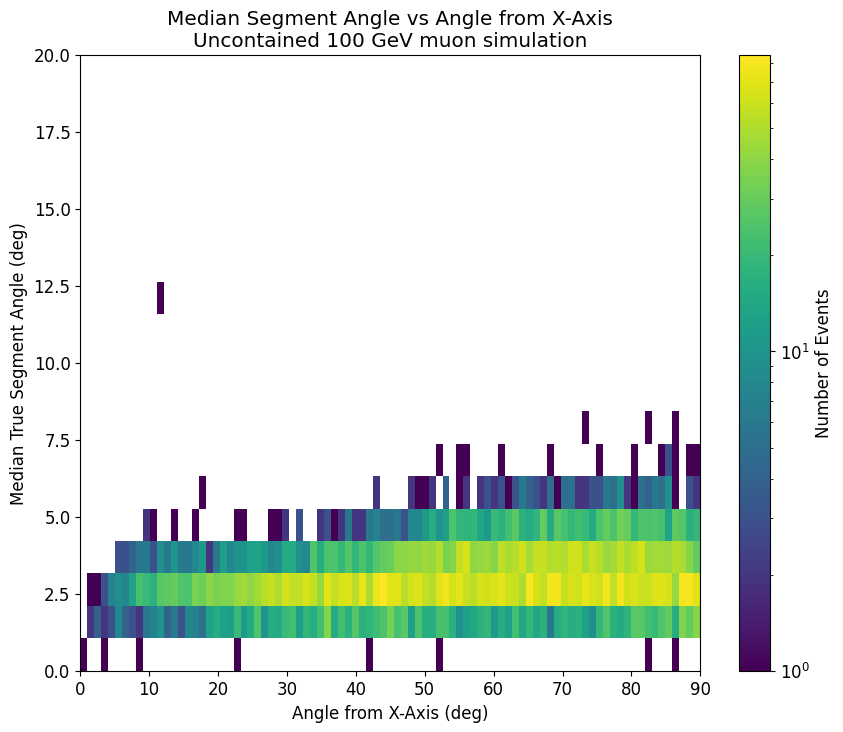

In [10]:
bins = (np.linspace(0, 90, 90), np.linspace(0, 20, 20))
plt.figure(figsize=(10, 8))
plt.hist2d(uncontained_df['true_angle_from_x_axis'], 
           uncontained_df['median_reco_segment_angle'],
           bins=bins, norm=mpl.colors.LogNorm())
plt.colorbar(label='Number of Events')
plt.xlabel('Angle from X-Axis (deg)')
plt.ylabel('Median Reco Segment Angle (deg)')
plt.title('Median Segment Angle vs Angle from X-Axis\nUncontained 100 GeV muon simulation')
plt.show()

plt.figure(figsize=(10, 8))
plt.hist2d(uncontained_df['true_angle_from_x_axis'], 
           uncontained_df['median_true_segment_angle'],
           bins=bins, norm=mpl.colors.LogNorm())
plt.colorbar(label='Number of Events')
plt.xlabel('Angle from X-Axis (deg)')
plt.ylabel('Median True Segment Angle (deg)')
plt.title('Median Segment Angle vs Angle from X-Axis\nUncontained 100 GeV muon simulation')
plt.show()

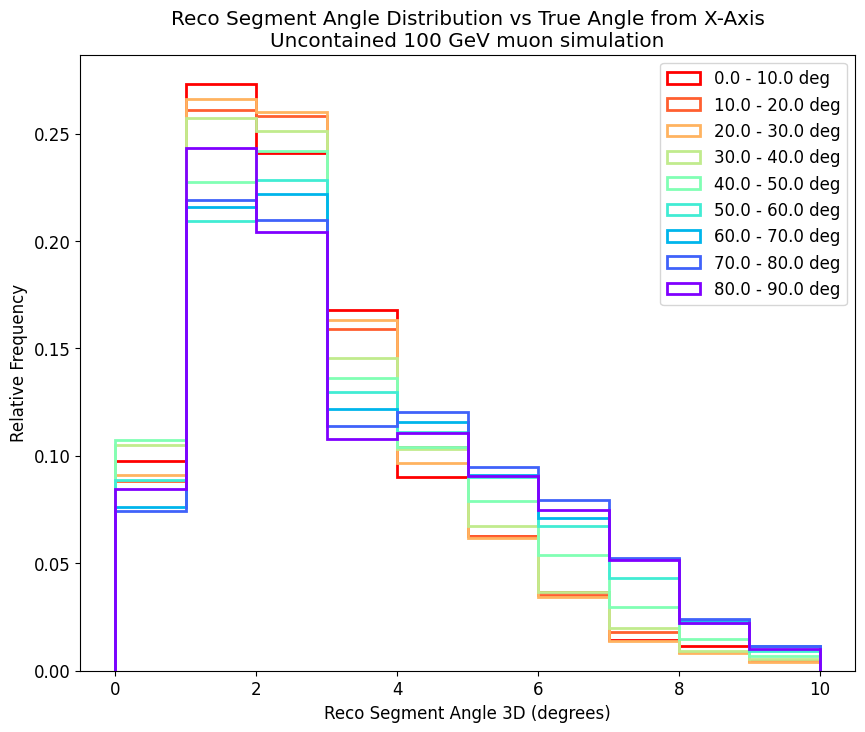

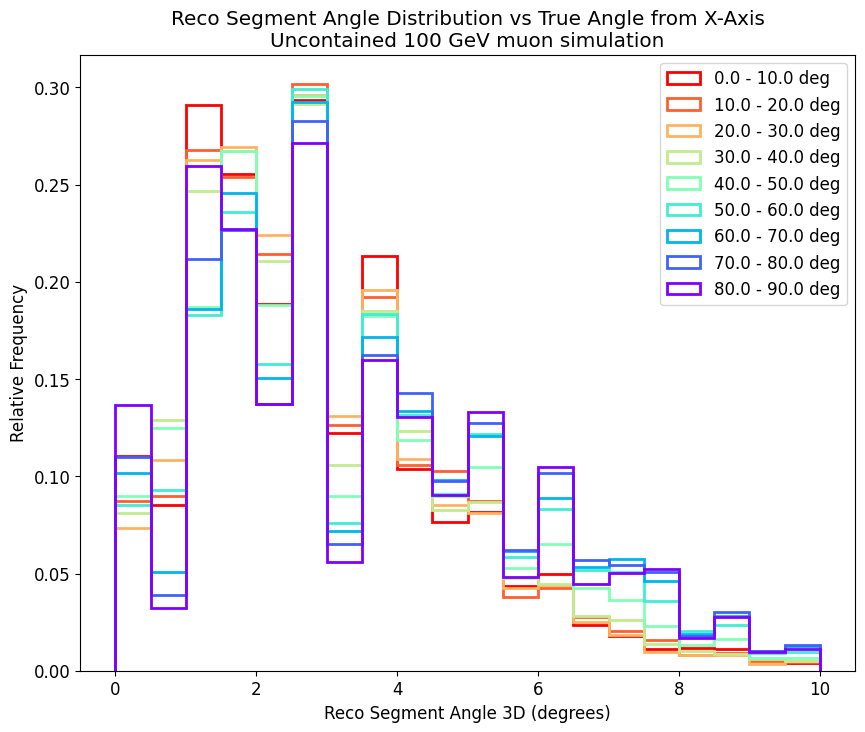

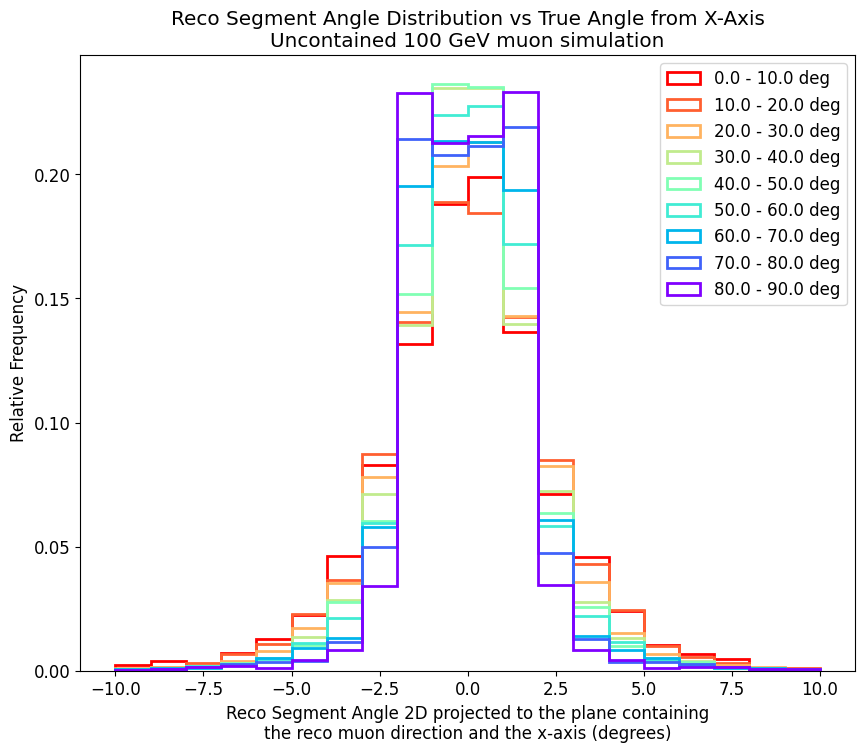

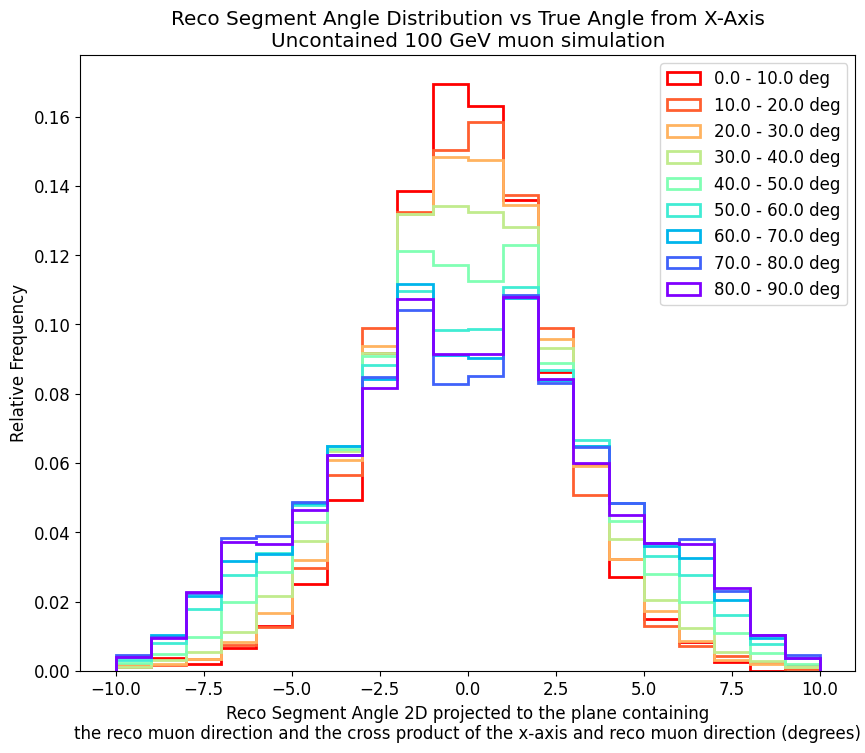

In [15]:
for angle_type in ["3d_larger_bins", "3d_smaller_bins", "mu_x", "mu_antix"]:

    if angle_type == "3d_larger_bins":
        segment_angles = uncontained_df['reco_3d_angles'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 3D (degrees)'
        bins = np.linspace(0, 10, 11)
    elif angle_type == "3d_smaller_bins":
        segment_angles = uncontained_df['reco_3d_angles'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 3D (degrees)'
        bins = np.linspace(0, 10, 21)
    elif angle_type == "mu_x":
        segment_angles = uncontained_df['reco_2d_angle_mu_x'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to the plane containing\nthe reco muon direction and the x-axis (degrees)'
        bins = np.linspace(-10, 10, 21)
    elif angle_type == "mu_antix":
        segment_angles = uncontained_df['reco_2d_angle_mu_antix'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to the plane containing\nthe reco muon direction and the cross product of the x-axis and reco muon direction (degrees)'
        bins = np.linspace(-10, 10, 21)
    elif angle_type == "recreated_3d":
        mu_x_angles = uncontained_df['reco_2d_angle_mu_x'].to_numpy()
        mu_antix_angles = uncontained_df['reco_2d_angle_mu_antix'].to_numpy()
        segment_angles = np.array([np.sqrt(ax**2 + ai**2) * 180 / np.pi for ax, ai in zip(mu_x_angles, mu_antix_angles)], dtype=object)
        xlabel = 'Recreated Reco Segment Angle 3D (degrees)'
        bins = np.linspace(0, 10, 11)
    else:
        raise ValueError(f"Invalid angle type: {angle_type}")
    segment_angles_by_x_angle = []

    x_angle_bins = np.linspace(0, 90, 10)
    x_angles = uncontained_df['true_angle_from_x_axis'].to_numpy()
    for i in range(len(x_angle_bins) - 1):
        curr_mask = (x_angles >= x_angle_bins[i]) & (x_angles < x_angle_bins[i+1])
        curr_segment_angles = segment_angles[curr_mask]
        total_segment_angles = np.array([])
        for event_segment_angles in curr_segment_angles:
            total_segment_angles = np.concatenate([total_segment_angles, event_segment_angles])
        segment_angles_by_x_angle.append(total_segment_angles)

    rainbow_colors = plt.cm.rainbow(np.linspace(1, 0, len(x_angle_bins) - 1))

    plt.figure(figsize=(10, 8))
    for i in range(len(x_angle_bins) - 1):
        plt.hist(segment_angles_by_x_angle[i], bins=bins, histtype='step', density=True, label=f'{x_angle_bins[i]} - {x_angle_bins[i+1]} deg', lw=2, color=rainbow_colors[i])
    plt.xlabel(xlabel)
    plt.ylabel('Relative Frequency')
    plt.title('Reco Segment Angle Distribution vs True Angle from X-Axis\nUncontained 100 GeV muon simulation')
    plt.legend()
    plt.show()


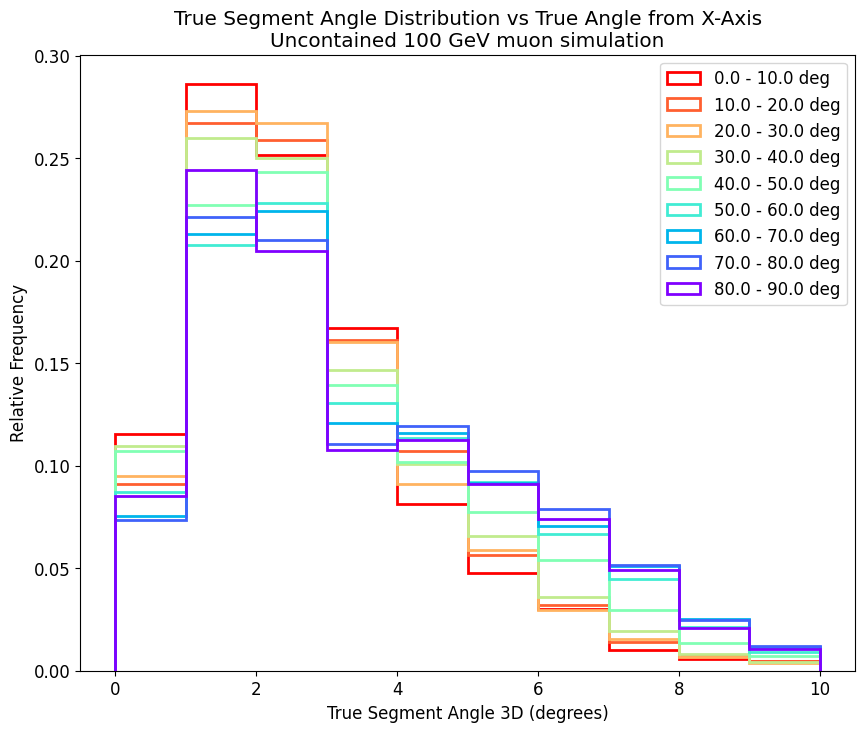

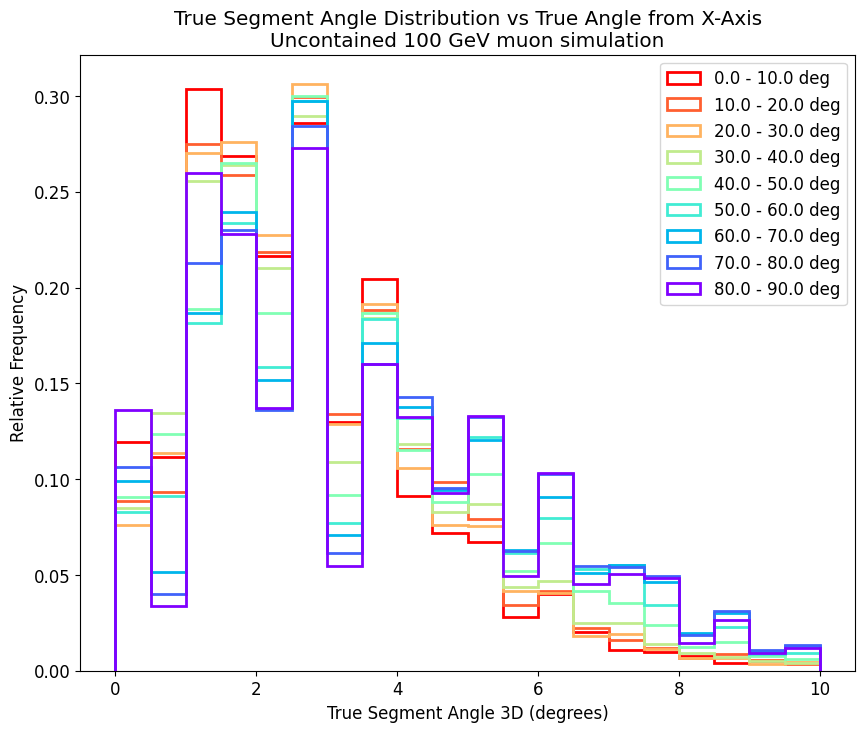

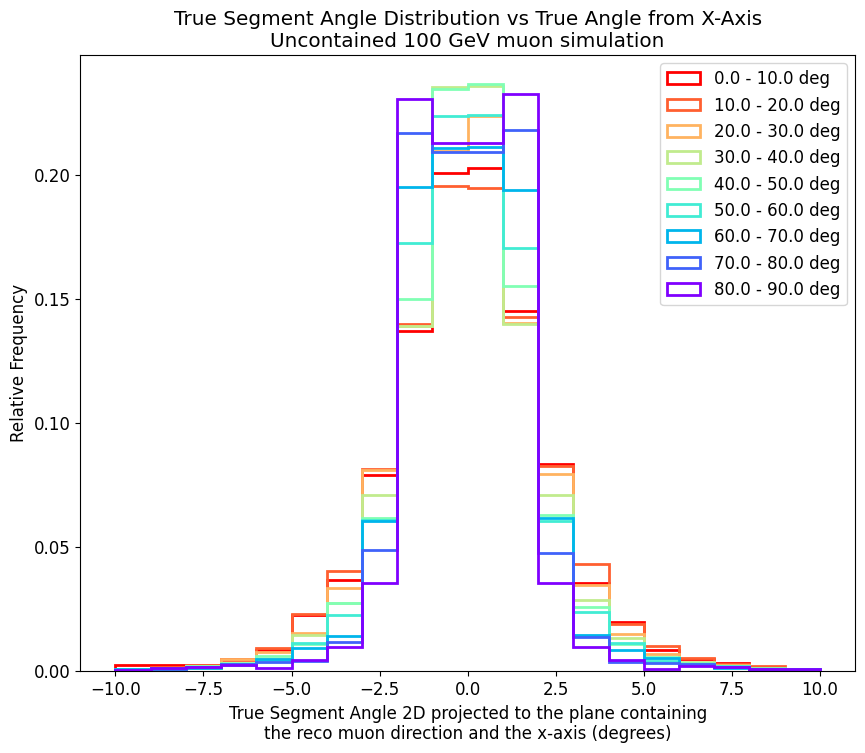

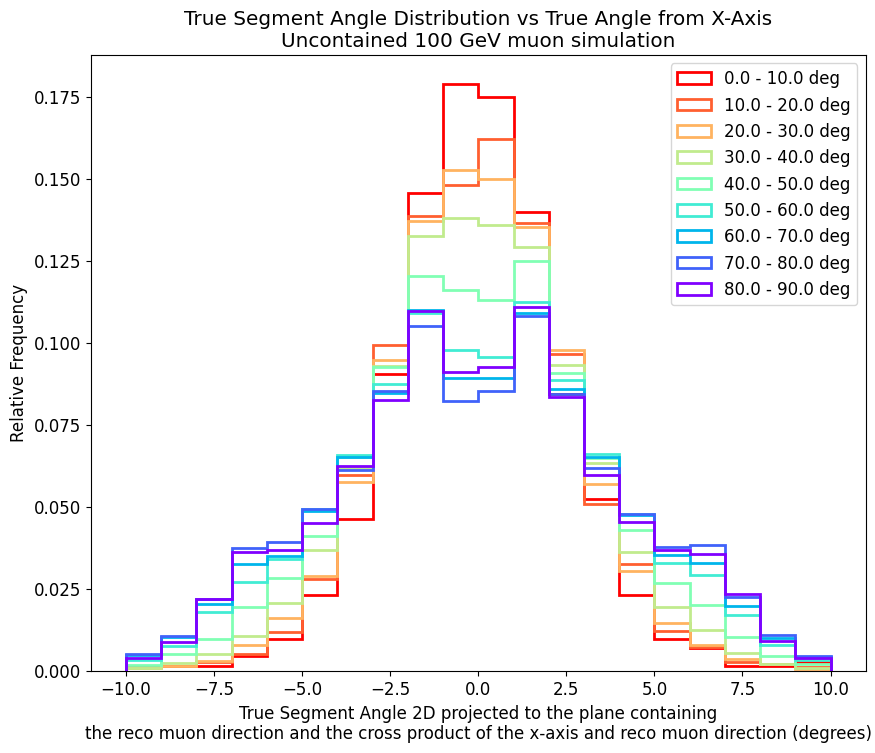

In [16]:
for angle_type in ["3d_larger_bins", "3d_smaller_bins", "mu_x", "mu_antix"]:

    if angle_type == "3d_larger_bins":
        segment_angles = uncontained_df['true_3d_angles'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 3D (degrees)'
        bins = np.linspace(0, 10, 11)
    elif angle_type == "3d_smaller_bins":
        segment_angles = uncontained_df['true_3d_angles'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 3D (degrees)'
        bins = np.linspace(0, 10, 21)
    elif angle_type == "mu_x":
        segment_angles = uncontained_df['true_2d_angle_mu_x'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 2D projected to the plane containing\nthe reco muon direction and the x-axis (degrees)'
        bins = np.linspace(-10, 10, 21)
    elif angle_type == "mu_antix":
        segment_angles = uncontained_df['true_2d_angle_mu_antix'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 2D projected to the plane containing\nthe reco muon direction and the cross product of the x-axis and reco muon direction (degrees)'
        bins = np.linspace(-10, 10, 21)
    else:
        raise ValueError(f"Invalid angle type: {angle_type}")
    segment_angles_by_x_angle = []

    x_angle_bins = np.linspace(0, 90, 10)
    x_angles = uncontained_df['true_angle_from_x_axis'].to_numpy()
    for i in range(len(x_angle_bins) - 1):
        curr_mask = (x_angles >= x_angle_bins[i]) & (x_angles < x_angle_bins[i+1])
        curr_segment_angles = segment_angles[curr_mask]
        total_segment_angles = np.array([])
        for event_segment_angles in curr_segment_angles:
            total_segment_angles = np.concatenate([total_segment_angles, event_segment_angles])
        segment_angles_by_x_angle.append(total_segment_angles)

    rainbow_colors = plt.cm.rainbow(np.linspace(1, 0, len(x_angle_bins) - 1))

    plt.figure(figsize=(10, 8))
    for i in range(len(x_angle_bins) - 1):
        plt.hist(segment_angles_by_x_angle[i], bins=bins, histtype='step', density=True, label=f'{x_angle_bins[i]} - {x_angle_bins[i+1]} deg', lw=2, color=rainbow_colors[i])
    plt.xlabel(xlabel)
    plt.ylabel('Relative Frequency')
    plt.title('True Segment Angle Distribution vs True Angle from X-Axis\nUncontained 100 GeV muon simulation')
    plt.legend()
    plt.show()
